# 📊 Analisi e Predizione del Churn nel settore Telecomunicazioni

## Introduzione
In questo progetto analizziamo il dataset "Telco Customer Churn" per comprendere le dinamiche di abbandono dei clienti (Churn) e sviluppare strategie di ritenzione basate sui dati.

### Obiettivi del Progetto
L'analisi si pone i seguenti obiettivi strategici:
1.  **Analisi dei Fattori:** Identificare quali variabili (demografiche, contrattuali, di servizio) influenzano maggiormente la decisione di abbandonare l'azienda.
2.  **Segmentazione (Clustering):** Raggruppare i clienti in profili omogenei per mirare meglio le campagne marketing.
3.  **Predizione (Modellazione):** Sviluppare un modello di Machine Learning capace di prevedere se un cliente abbandonerà.

### Specifiche Tecniche
Il progetto è sviluppato in **Python** utilizzando le seguenti librerie per l'analisi dati e la visualizzazione:
* **Data Manipulation:** `Pandas`, `NumPy`
* **Visualization:** `Matplotlib`, `Seaborn` (con palette personalizzata ad alto contrasto)
* **Machine Learning:** `Scikit-Learn` (K-Means per il Clustering, Logistic Regression per la Classificazione)

## Struttura dell'Analisi
Il notebook segue questo flusso logico:
1. **Data Cleaning (pulizia):** Gestione valori nulli e conversione tipi di dato.
2. **EDA (Exploratory Data Analysis):** Analisi statistica e visuale delle distribuzioni.
3. **Clustering (profilazione):** Segmentazione non supervisionata per trovare profili nascosti.
4. **Modellazione (conclusioni strategiche):** Addestramento e valutazione del modello predittivo.

---

## Setup Ambiente, Librerie, Dataset 


In [ ]:
# Importazione delle librerie necessarie
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Configurazione stile grafici
sns.set(style="whitegrid")
%matplotlib inline

# Definizione palette personalizzata 
custom_palette = {"Yes": "#2ECC71", "No": "#E74C3C"}

# Caricamento Dataset
try:
    df = pd.read_csv('../data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
    print(f"Dataset caricato correttamente: {df.shape[0]} righe, {df.shape[1]} colonne")
except FileNotFoundError:
    print("Errore: File non trovato. Assicurati che il file sia in '../data/WA_Fn-UseC_-Telco-Customer-Churn.csv'")

df.head()

print("Librerie caricate e palette colori configurata (Sì=Verde, No=Rosso).")


Dataset caricato correttamente: 7043 righe, 21 colonne
Librerie caricate e palette colori configurata (Sì=Verde, No=Rosso).


---

## 1. Data Cleaning (Pulizia dei Dati)

**Obiettivo:** Preparare il dataset per l'analisi rimuovendo le incoerenze, gestendo i valori mancanti e correggendo i tipi di dato.

**Script di Analisi:**
1.  controllo preliminare della strutura dati, tipi e valori nulli.
2.  Conversione della colonna `TotalCharges` da stringa a numerico (gestione errori di conversione).
3.  Rimozione dei valori nulli e della colonna identificativa `customerID` (inutile ai fini predittivi).

### 1.1 Analisi dei dati

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Osservazione:** Notiamo che la colonna `TotalCharges` è di tipo `object` (stringa), mentre dovrebbe essere numerica (`float`). Questo suggerisce la presenza di caratteri non numerici (spesso spazi vuoti) che devono essere gestiti.

### 1.2 Conversione dei dati

In [ ]:
# 'coerce' trasforma le stringhe vuote o con spazi in NaN (Not a Number)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

### 1.3 Sistemazione dataset

In [ ]:
# Contiamo quanti valori nulli sono stati generati
nulli = df['TotalCharges'].isnull().sum()
print(f"Valori nulli trovati in 'TotalCharges': {nulli}")

# Rimuoviamo le righe con valori nulli (essendo pochi, non impatta l'analisi)
df.dropna(inplace=True)

# Il CustomerID è univoco e non porta informazione statistica
if 'customerID' in df.columns:
    df.drop(columns=['customerID'], inplace=True)

print(f"Dimensioni dopo la pulizia: {df.shape}")
df.head()

Valori nulli trovati in 'TotalCharges': 11
Dimensioni dopo la pulizia: (7032, 20)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


---

## 2. Exploratory Data Analysis (EDA)

**Obiettivo:** Esplorare visivamente le relazioni tra le caratteristiche dei clienti e il tasso di abbandono.

### 2.1 Analisi della Variabile Target (Churn)
Prima di tutto, analizziamo la distribuzione della variabile che vogliamo prevedere: il **Churn** (Abbandono).


È fondamentale capire se il dataset è bilanciato (numero simile di clienti che abbandonano e che rimangono) o sbilanciato. Dataset fortemente sbilanciati possono influenzare negativamente le prestazioni dei modelli di classificazione, portandoli a predire sempre la classe maggioritaria.

Percentuale di abbandono (Yes): 26.58%


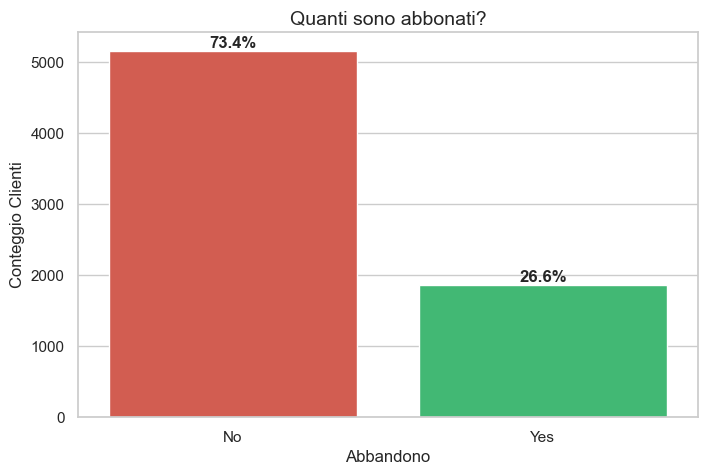

In [ ]:
perc_churn = (df['Churn'].value_counts() / len(df)) * 100
print(f"Percentuale di abbandono (Yes): {perc_churn['Yes']:.2f}%")

# Creazione del grafico a barre (Countplot)
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Churn', hue='Churn', data=df, palette=custom_palette, legend=False)

# Personalizzazione Grafico
plt.title('Quanti sono abbonati?', fontsize=14)
plt.xlabel('Abbandono', fontsize=12)
plt.ylabel('Conteggio Clienti', fontsize=12)

# Aggiunta etichette percentuali sulle barre
total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.show()

**Insight:**
Il grafico mostra un chiaro sbilanciamento: circa il **26.6%** dei clienti ha abbandonato il servizio (Churn = Yes). Sebbene non sia uno sbilanciamento estremo (come nelle frodi, <1%), è significativo. In fase di modellazione, dovremo prestare maggiorni attenzioni ai parametri di bilanciamento.

### 2.2 Analisi della Fedeltà (Tenure)
Analisi della distribuzione della tenure rispetto all'abbandono.

**Domanda di Business:** Esiste un "periodo critico" iniziale in cui il rischio di abbandono è più alto?

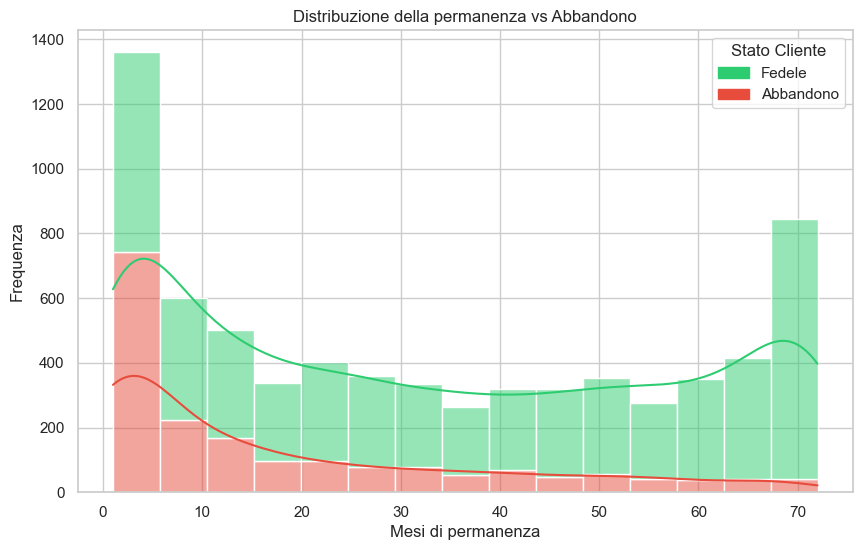

In [ ]:
# Istogramma della 'Mesi_Permanenza' diviso per Abbandono
import matplotlib.patches as mpatches

plt.figure(figsize=(10, 6))
# Colori: No (Fedele) -> Verde, Yes (Abbandono) -> Rosso
fedele_patch = mpatches.Patch(color='#2ECC71', label='Fedele')
abbandono_patch = mpatches.Patch(color='#E74C3C', label='Abbandono')

sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', kde=True, 
             palette=palette_colors, hue_order=['No', 'Yes'])

plt.title('Distribuzione della permanenza vs Abbandono')
plt.xlabel('Mesi di permanenza')
plt.ylabel('Frequenza')
plt.legend(handles=[fedele_patch, abbandono_patch], title='Stato Cliente')
plt.show()

#### insight: Vulnerabilità dei Nuovi Clienti
L'analisi temporale rivela che il rischio di abbandono non è lineare ma fortemente concentrato nei **primi 1-6 mesi** di contratto.
*   **Fase Critica:** I nuovi clienti rappresentano il segmento più vulnerabile; superato il primo anno, il tasso di fedeltà (retention) si stabilizza notevolmente.
*   **Zoccolo Duro:** Si osserva una netta polarizzazione con un forte gruppo di clienti a lungo termine (**70+ mesi**) che mostrano una resistenza all'abbandono quasi totale, garantendo una base solida per l'azienda.

### 2.3 Analisi Contrattuale ed Economica
Esaminiamo ora l'impatto del tipo di contratto (`Contract`) e della spesa mensile (`MonthlyCharges`) sulla decisione di abbandonare.

C:\Users\Utente\AppData\Local\Temp\ipykernel_7580\2429760253.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['Fedele', 'Abbandono'])


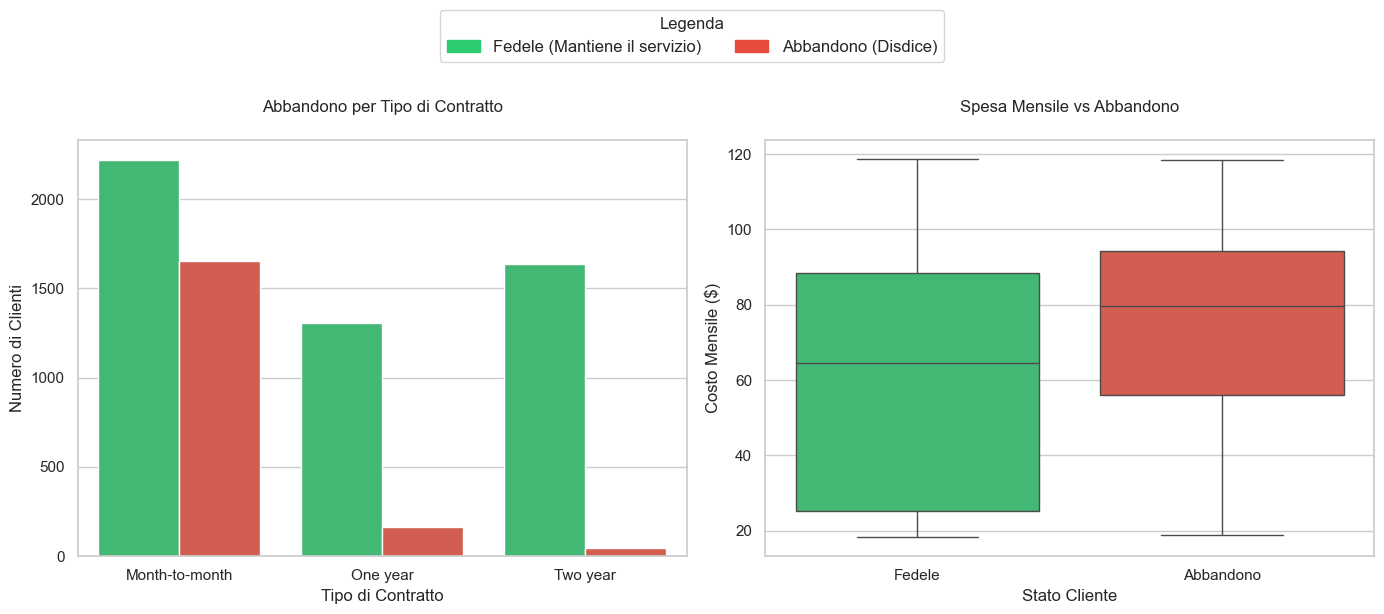

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Colori Corretti: No (Fedele)=Verde, Yes (Abbandono)=Rosso
fedele_patch = mpatches.Patch(color='#2ECC71', label='Fedele (Mantiene il servizio)')
abbandono_patch = mpatches.Patch(color='#E74C3C', label='Abbandono (Disdice)')

# Grafico 1: Tipo di Contratto
sns.countplot(x='Contract', hue='Churn', data=df, palette=palette_colors, hue_order=['No', 'Yes'], ax=axes[0])
axes[0].set_title('Abbandono per Tipo di Contratto', pad=20)
axes[0].set_xlabel('Tipo di Contratto')
axes[0].set_ylabel('Numero di Clienti')
axes[0].get_legend().remove()

# Grafico 2: Spesa Mensile
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette=palette_colors, hue='Churn', hue_order=['No', 'Yes'], legend=False, ax=axes[1])
axes[1].set_title('Spesa Mensile vs Abbandono', pad=20)
axes[1].set_xlabel('Stato Cliente')
axes[1].set_ylabel('Costo Mensile ($)')
axes[1].set_xticklabels(['Fedele', 'Abbandono'])


fig.legend(handles=[fedele_patch, abbandono_patch], loc='lower center', bbox_to_anchor=(0.5, 0.92), ncol=2, 
           title="Legenda", frameon=True, fontsize='medium')
plt.tight_layout(rect=[0, 0, 1, 0.90]) # Lascia spazio per la legenda in alto
plt.show()

#### insight: Fatturato e Contratti
Dai grafici emergono due chiare evidenze:
1.  **Impatto del Contratto:** Esiste una correlazione fortissima tra contratti mensili (**Month-to-month**) e tasso di abbandono (barre Rosse). I contratti a lungo termine (1-2 anni) garantiscono una stabilità quasi totale.
2.  **Paradosso della Spesa:** I clienti che abbandonano (box Rosso) presentano una **mediana di spesa mensile più alta** rispetto ai fedeli. Questo indica che l'azienda sta perdendo clienti "High-Value" (alto valore), probabilmente a causa di una maggiore sensibilità al prezzo o di offerte aggressive della concorrenza.

---

## 3. Clustering (Segmentazione Clienti)

**Obiettivo:** Oltre alla semplice predizione dell'abbandono, vogliamo identificare profili di clienti simili per definire strategie di marketing personalizzate (Retention mirata).

Utilizzeremo l'algoritmo **K-Means** (apprendimento non supervisionato) focalizzandoci sulle due leve strategiche emerse dall'EDA:
1.  **Tenure (Fedeltà):** Anzianità del cliente.
2.  **MonthlyCharges (Valore):** Capacità di spesa mensile.

### 3.1 Preparazione Dati


In [ ]:
# 1. Selezione delle due variabili per il clustering
X_cluster = df[['tenure', 'MonthlyCharges']]

# 2. Scalare i dati (StandardScaler: media=0, dev.std=1)
    # Il K-Means è sensibile alla scala (usa la distanza euclidea), quindi lo scaling è obbligatorio
scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

print("Dati scalati e pronti per il clustering")

Dati scalati e pronti per il clustering


### 3.2 Determinazione del numero ottimale di Cluster (Elbow Method)
Il K-Means richiede di specificare a priori il numero di cluster ($K$). Per trovare il $K$ ottimale, usiamo il **Metodo del Gomito (Elbow Method)**: calcoliamo la somma dei quadrati delle distanze intra-cluster (Inerzia) al variare di $K$ e cerchiamo il punto in cui la curva inizia ad appiattirsi (il "gomito").

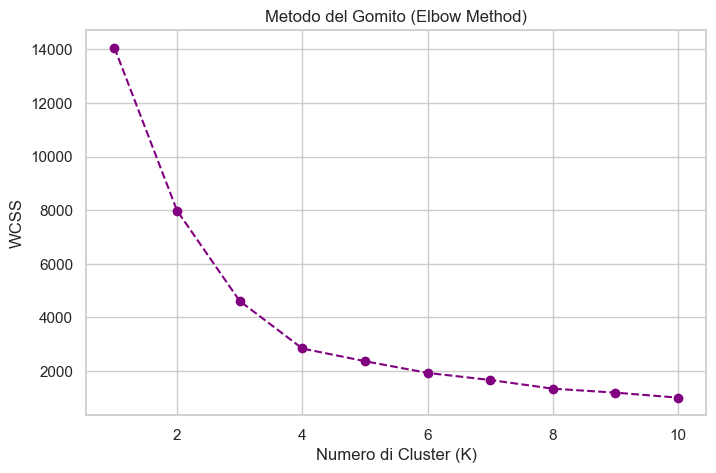

In [ ]:
# Calcolo dell'inerzia (WCSS) per K da 1 a 10
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_cluster_scaled)
    wcss.append(kmeans.inertia_)

# Grafico del Gomito
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='purple')
plt.title('Metodo del Gomito (Elbow Method)')
plt.xlabel('Numero di Cluster (K)')
plt.ylabel('WCSS')
plt.show()

** insight Scelta di K:**
Dal grafico osserviamo che la riduzione dell'inerzia rallenta significativamente dopo **K=3**. Questo suggerisce che 3 cluster sono sufficienti per catturare le principali differenze nei dati senza complicare eccessivamente il modello. Procediamo quindi con la creazione di 3 segmenti.

In [ ]:
# Applicazione K-Means (K=3)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Segmento'] = kmeans.fit_predict(X_cluster_scaled)

# Logica di assegnazione etichette
profilo_cluster = df.groupby('Segmento')[['tenure', 'MonthlyCharges']].mean()
media_permanenza_globale = df['tenure'].mean()
media_spesa_globale = df['MonthlyCharges'].mean()

def assegna_etichetta_cluster(row):
    # Estraiamo le caratteristiche medie del cluster di appartenenza
    permanenza_cluster = profilo_cluster.loc[row['Segmento'], 'tenure']
    spesa_cluster = profilo_cluster.loc[row['Segmento'], 'MonthlyCharges']
    
    if permanenza_cluster < media_permanenza_globale * 0.5:
        return 'Nuovi Clienti'
    elif spesa_cluster > media_spesa_globale and permanenza_cluster > media_permanenza_globale:
        return 'Clienti VIP Fedeli'
    else:
        return 'Clienti Standard'

df['Etichetta_Segmento'] = df.apply(assegna_etichetta_cluster, axis=1)

# Visualizzazione Risultati
display(df.groupby('Etichetta_Segmento')[['tenure', 'MonthlyCharges']].mean().round(0).astype(int).rename(columns={'tenure':'Mesi Permanenza', 'MonthlyCharges':'Costo Mensile'}))

,Mesi Permanenza,Costo Mensile
Etichetta_Segmento,,
Clienti Standard,29,26
Clienti VIP Fedeli,58,89
Nuovi Clienti,13,75


### 3.3 Visualizzazione dei segmenti
Visualizziamo i cluster risultanti su un grafico a dispersione (Scatter Plot) per osservarne la distribuzione spaziale rispetto a Fedeltà e Spesa.

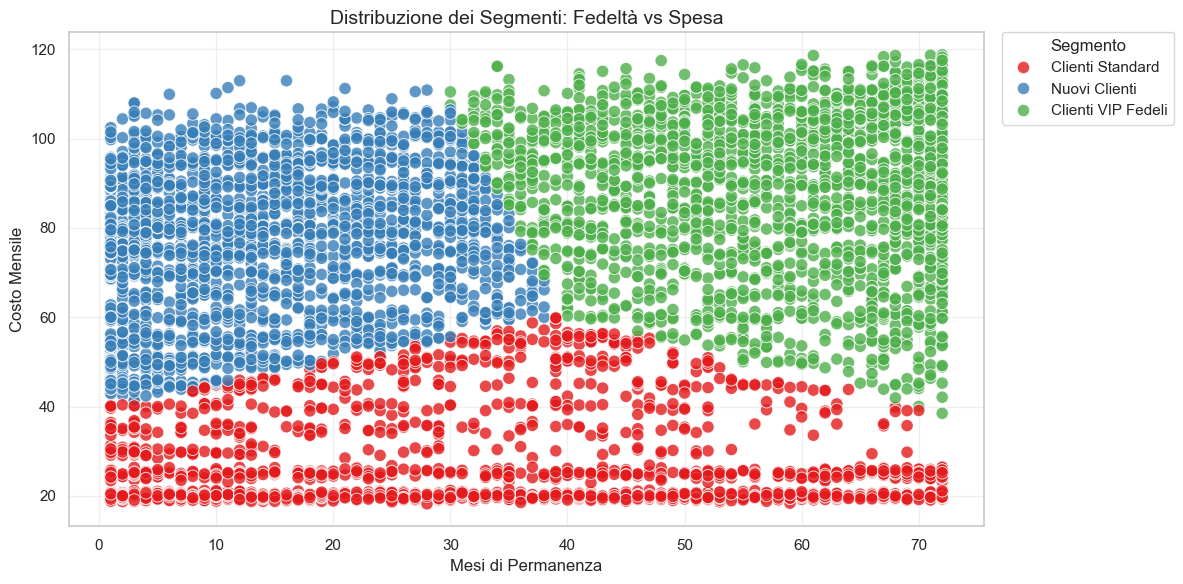

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', hue='Etichetta_Segmento', palette='Set1', s=80, alpha=0.8)

plt.title('Distribuzione dei Segmenti: Fedeltà vs Spesa', fontsize=14)
plt.xlabel('Mesi di Permanenza')
plt.ylabel('Costo Mensile')
plt.grid(True, alpha=0.3)

plt.legend(title='Segmento', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.tight_layout()
plt.show()

### Interpretazione Strategica dei Profili
Analizzando il grafico e le medie, identifichiamo tre segmenti chiave per il business:
1.  🔵 **"I Nuovi Alto-Spendenti" (ALTO RISCHIO):**
    *   **Identikit:** Clienti recenti (bassa tenure) con spesa mensile elevata.
    *   **Insight:** Sono il segmento più critico. Stanno "provando" il servizio premium ma non sono fidelizzati (>50% di abbandono).
    *   **Azione:** **Priorità Massima.** Richiedono onboarding assistito e incentivi per vincolarli (es. sconti su piani annuali).
2.  🟢 **"Clienti VIP Fedeli" (Basso Rischio):**
    *   **Identikit:** Alta tenure e spesa medio-alta.
    *   **Insight:** Zoccolo duro del fatturato. Soddisfatti e stabili.
    *   **Azione:** Programmi fedeltà e Reward per mantenere l'engagement.
3.  🔴 **"Base Standard" (Rischio Medio):**
    *   **Identikit:** Spesa contenuta, tenure variabile.
    *   **Insight:** Cliente medio con servizi essenziali.
    *   **Azione:** Upselling graduale per aumentare il valore (ARPU).

---

## 4. Modellazione Predittiva (Classification)

**Obiettivo:** Addestrare un modello di Machine Learning per prevedere se un cliente abbandonerà (**Churn = 1**) o resterà (**Churn = 0**).

Abbiamo scelto la **Logistic Regression** per questo task. Ecco perché:
1.  **Efficacia:** È un ottimo punto di partenza (baseline) per problemi di classificazione binaria.
2.  **Interpretabilità:** Analizzando i *coefficienti*, possiamo capire quali variabili (es. contratto mensile, fibra ottica) "spingono" il cliente verso l'abbandono.

**Workflow di Analisi:**
1.  **Preprocessing:** Trasformazione delle variabili categoriche in numeri (Label Encoding / Dummy Variables).
2.  **Split:** Divisione training/test (80/20).
3.  **Training:** Addestramento modello.
4.  **Evaluation:** Valutazione performance (Accuracy & Recall).

### 4.1 Preprocessing dei Dati
I modelli di Machine Learning richiedono dati numerici. Dobbiamo quindi trasformare le variabili categoriche:
-   **Label Encoding:** Per variabili binarie (es. *Gender: Male/Female* -> 0/1).
-   **One-Hot Encoding:** Per variabili con più categorie (es. *Contract: Month-to-month, One year...* -> colonne separate).

Inoltre, dividiamo il dataset in **Training Set** (80% dei dati per istruire il modello) e **Test Set** (20% per valutarne le prestazioni).

In [ ]:
# Copia dataset per preprocessing
df_model = df.copy()

# 1. Rimuoviamo le colonne del Clustering per non influenzare la previsione (Data Leakage o non rilevanza)
cols_to_drop = ['Segmento', 'Etichetta_Segmento']
df_model.drop(columns=[c for c in cols_to_drop if c in df_model.columns], inplace=True)

# 2. Trasformiamo la variabile target 'Churn' in numeri: 1 per chi abbandona, 0 per chi resta
df_model['Churn'] = df_model['Churn'].map({'Yes': 1, 'No': 0})

# 3. One-Hot Encoding: Trasformiamo le variabili categoriche in colonne binarie
    # 'drop_first=True' serve a evitare la ridondanza (multicollinearità)
df_model = pd.get_dummies(df_model, drop_first=True)

# 4. Split Features/Target:
    # X = Variabili indipendenti (il 'materiale di studio' del modello)
    # y = Variabile target (la 'risposta giusta' da prevedere)
X = df_model.drop('Churn', axis=1)
y = df_model['Churn']

# 5. Split Train/Test (80/20): 80% per addestrare, 20% per valutare se ha imparato bene
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dati pronti per il modello")
print(f"Dimensioni Training Set: {X_train.shape}")
print(f"Dimensioni Test Set: {X_test.shape}")

Dati pronti per il modello
Dimensioni Training Set: (5625, 30)
Dimensioni Test Set: (1407, 30)


### 4.2 Feature Scaling (Normalizzazione)
La **Logistic Regression** è un algoritmo basato sull'ottimizzazione (Discesa del Gradiente) ed è quindi sensibile alla scala delle variabili numeriche.
Se le feature hanno ordini di grandezza molto diversi (es. `tenure` [0-72] vs `TotalCharges` [0-8000]), l'algoritmo fatica a convergere e i pesi (coefficienti) assegnati alle variabili non sono direttamente confrontabili.

**Soluzione:** Utilizziamo lo **StandardScaler** per standardizzare i dati numerici ($z = \frac{x - \mu}{\sigma}$), portandoli ad avere media 0 e deviazione standard 1.

In [ ]:
# Seleziona solo le colonne numeriche da scalare
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

scaler = StandardScaler()

# Sul Train Set usiamo fit_transform: il modello impara media e deviazione standard dai dati di training
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])

# Sul Test Set usiamo SOLO transform: usiamo la media/dev.std imparate dal train per simulare dati mai visti
    # Questo evita il "Data Leakage" (non dobbiamo sapere nulla del test set durante il training)
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

print("Scaling completato")

Scaling completato


### 4.3 Addestramento del Modello
Addestriamo il modello sui dati di training. Il modello imparerà la relazione tra le caratteristiche del cliente (X) e la decisione di abbandono (y).

In [ ]:
# Creazione e Addestramento
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Predizione sul Test Set
y_pred = log_reg.predict(X_test)

# Accuratezza semplice
acc = accuracy_score(y_test, y_pred)
print(f"Accuratezza del modello: {acc*100:.2f}%")

Accuratezza del modello: 78.68%


### 4.4 Valutazione delle Performance
Valutiamo il modello sul Test Set (dati mai visti). Oltre all'**Accuratezza** (percentuale di risposte corrette), analizzeremo:
-   **Matrice di Confusione:** Per vedere quanti falsi positivi e falsi negativi facciamo.
-   **Precision & Recall:** Fondamentali dato che il dataset è sbilanciato.

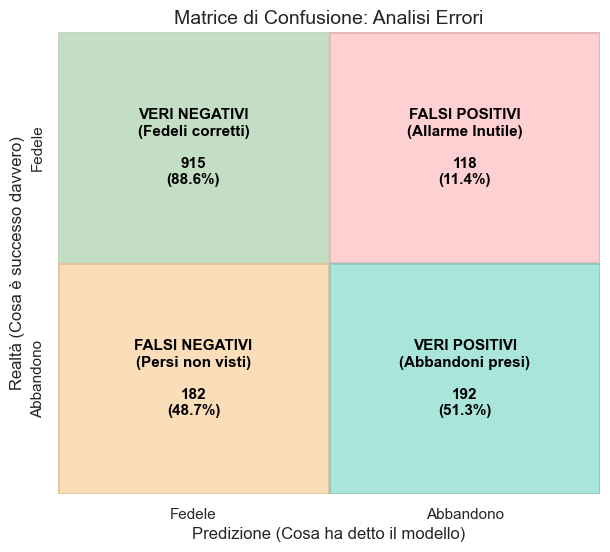

,Precisione %,Richiamo/Sensibilità %,F1-Score %,Supporto (N)
Fedele,83.41,88.58,85.92,1033
Abbandono,61.94,51.34,56.14,374
Accuratezza Generale,78.68,78.68,78.68,1
Media Macro,72.67,69.96,71.03,1407
Media Ponderata,77.70,78.68,78.00,1407


In [ ]:
plt.figure(figsize=(7, 6))

# Calcolo della matrice grezza (conteggi)
cm = confusion_matrix(y_test, y_pred)
# Calcolo delle percentuali per riga (utile per vedere la "Recall" di ogni classe)
cm_percentages = cm / cm.sum(axis=1)[:, np.newaxis]

# --- Definizione Colori Semantici ---
    # TP (Veri Positivi) e TN (Veri Negativi) -> Verde (Bene)
    # FP (Falsi Positivi) -> Rosso Chiaro (Errore meno grave)
    # FN (Falsi Negativi) -> Arancione (Errore GRAVE: cliente perso non visto)
colors = [['#d9f2d0', '#ffcccc'],  # Riga 0: TN (Verde), FP (Rosso)
          ['#ffdbb3', '#a3e4d7']]  # Riga 1: FN (Arancione), TP (Verde)]

# --- Creazione Plot ---
# Heatmap base che nasconde i colori automatici disegnandoci sopra
ax = sns.heatmap(cm, annot=False, cbar=False, cmap='Blues', linewidths=1, linecolor='black')

# Sovrascrive ogni cella con rettangoli colorati
for i in range(2):
    for j in range(2):
        # Disegna il rettangolo colorato
        ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=True, color=colors[i][j], alpha=0.9, lw=0))
        
        # Prepara il testo con Conteggio e Percentuale
        val = cm[i, j]
        pct = cm_percentages[i, j]
    
        if i==0 and j==0: text = f"VERI NEGATIVI\n(Fedeli corretti)\n\n{val}\n({pct:.1%})"
        elif i==0 and j==1: text = f"FALSI POSITIVI\n(Allarme Inutile)\n\n{val}\n({pct:.1%})"
        elif i==1 and j==0: text = f"FALSI NEGATIVI\n(Persi non visti)\n\n{val}\n({pct:.1%})"
        elif i==1 and j==1: text = f"VERI POSITIVI\n(Abbandoni presi)\n\n{val}\n({pct:.1%})"
        
        # Inserisce il testo al centro della cella
        ax.text(j+0.5, i+0.5, text, ha='center', va='center', fontsize=11, weight='bold', color='black')

plt.title('Matrice di Confusione: Analisi Errori', fontsize=14)
plt.ylabel('Realtà (Cosa è successo davvero)')
plt.xlabel('Predizione (Cosa ha detto il modello)')
plt.xticks([0.5, 1.5], ['Fedele', 'Abbandono'])
plt.yticks([0.5, 1.5], ['Fedele', 'Abbandono'])
plt.show()

# --- Report Metriche Dettagliato ---
# Converte il report testuale in DataFrame
report_dict = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report_dict).transpose()

df_report.rename(index={'0': 'Fedele', '1': 'Abbandono', 'accuracy': 'Accuratezza Generale', 
                        'macro avg': 'Media Macro', 'weighted avg': 'Media Ponderata'}, 
                 columns={'precision': 'Precisione %', 'recall': 'Richiamo/Sensibilità %', 
                          'f1-score': 'F1-Score %', 'support': 'Supporto (N)'}, inplace=True)

# Converte in percentuali (per leggibilità)
cols_pct = ['Precisione %', 'Richiamo/Sensibilità %', 'F1-Score %']
df_report[cols_pct] = df_report[cols_pct] * 100

# Visualizza la tabella formattata
display(df_report.style.format("{:.2f}", subset=cols_pct).format("{:.0f}", subset=['Supporto (N)']))

### 4.5 Feature Importance (Quali fattori guidano il Churn?)
Analizzando i coefficienti del modello, possiamo capire quali variabili aumentano o diminuiscono la probabilità di abbandono.
-   **Coefficienti Positivi (Barre Rosse):** Aumentano il rischio di Churn.
-   **Coefficienti Negativi (Barre Verdi):** Proteggono dal Churn (aumentano la fedeltà).

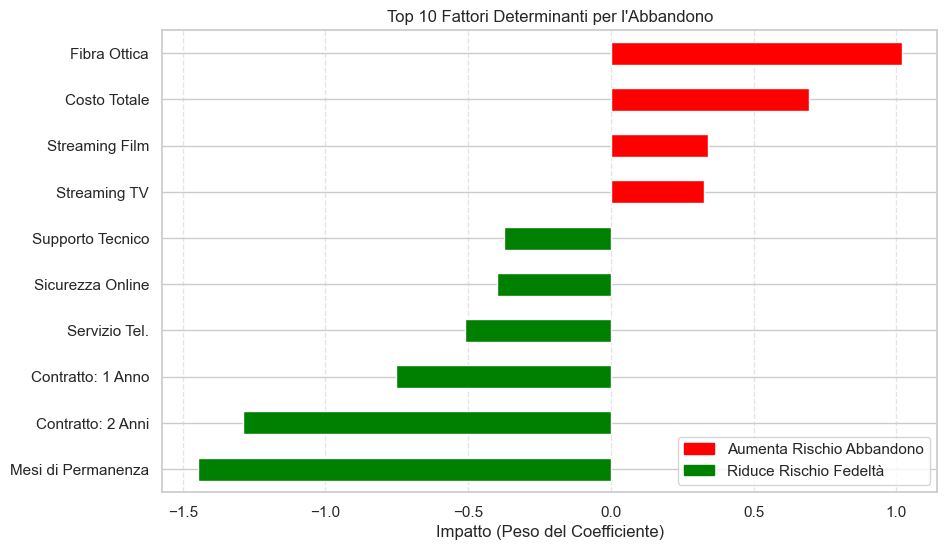

In [ ]:
# Estrazione dei coefficienti
weights = pd.Series(log_reg.coef_[0], index=X.columns)

# Dizionario Mappatura: Inglese (Dataset) -> Italiano (Plot)
col_map = {
    'tenure': 'Mesi di Permanenza',
    'MonthlyCharges': 'Costo Mensile',
    'TotalCharges': 'Costo Totale',
    'gender_Male': 'Uomo',
    'SeniorCitizen': 'Anziano',
    'Partner_Yes': 'Partner (Sì)',
    'Dependents_Yes': 'Familiari a Carico',
    'PhoneService_Yes': 'Servizio Tel.',
    'MultipleLines_Yes': 'Linee Multiple',
    'InternetService_Fiber optic': 'Fibra Ottica',
    'InternetService_No': 'No Internet',
    'OnlineSecurity_Yes': 'Sicurezza Online',
    'OnlineBackup_Yes': 'Backup Online',
    'DeviceProtection_Yes': 'Protezione Dispositivo',
    'TechSupport_Yes': 'Supporto Tecnico',
    'StreamingTV_Yes': 'Streaming TV',
    'StreamingMovies_Yes': 'Streaming Film',
    'Contract_One year': 'Contratto: 1 Anno',
    'Contract_Two year': 'Contratto: 2 Anni',
    'PaperlessBilling_Yes': 'Fattura Digitale',
    'PaymentMethod_Credit card (automatic)': 'Pagam.: Carta di Credito',
    'PaymentMethod_Electronic check': 'Pagam.: Assegno Elettronico',
    'PaymentMethod_Mailed check': 'Pagam.: Assegno Postale'
}

# Rinomina l'indice (se una feature non è nel dizionario, mantiene il nome originale)
weights.index = [col_map.get(x, x) for x in weights.index]

# --- Selezione dei Top 10 Fattori più Influenti ---
# Spiegazione logica:
# 1. weights.abs(): Consideriamo il valore assoluto perché ci interessa la forza dell'impatto, 
#    indipendentemente se positivo (aumenta churn) o negativo (riduce churn).
# 2. argsort(): Ottieniamo gli indici che ordinerebbero la serie.
# 3. iloc[...]: Riordiniamo la serie originale usando questi indici.
# 4. head(10): Prendiamo i primi 10 (i più forti in assoluto).
# 5. sort_values(): Li riordiniamo dal più piccolo al più grande SOLO per l'estetica del grafico a barre.
top_weights = weights.iloc[(-weights.abs()).argsort()].head(10).sort_values()

# colori legenda
red_patch = mpatches.Patch(color='red', label='Aumenta Rischio Abbandono')
green_patch = mpatches.Patch(color='green', label='Riduce Rischio Fedeltà')

plt.figure(figsize=(10, 6))
colors = ['red' if x > 0 else 'green' for x in top_weights]
top_weights.plot(kind='barh', color=colors)
plt.legend(handles=[red_patch, green_patch], loc='lower right')
plt.title('Top 10 Fattori Determinanti per l\'Abbandono')
plt.xlabel('Impatto (Peso del Coefficiente)')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

---

## 5. Conclusioni e Raccomandazioni Strategiche

### 5.1 Sintesi dei Risultati
L'analisi ha permesso di identificare i **key driver del churn** e di segmentare la customer base in profili di rischio distinti.

*   **Tasso di Abbandono (Global Churn):** **26.6%**.
*   **Fattori Critici:** I clienti più a rischio sono caratterizzati da **contratti mensili**, utilizzo della **Fibra Ottica** e pagamenti digitali. È emerso un paradosso: i clienti "alto-spendenti" sono spesso quelli più propensi all'abbandono.
*   **Tempistica del Rischio:** La fase critica sono i primi **6 mesi**. Superato il primo anno ("scoglio del rinnovo"), la fedeltà aumenta drasticamente.

### 5.2 Performance del Modello
Il modello di **Logistic Regression** ha raggiunto un'accuratezza del **~79%**.
*   **Punti di forza:** Eccellente interpretabilità. I coefficienti hanno confermato che i contratti a lungo termine (1-2 anni) sono il più forte deterrente contro il churn.
*   **Aree di miglioramento:** La capacità di individuare tutti i clienti a rischio (Recall) può essere potenziata in futuro testando modelli ensemble (es. Random Forest, XGBoost) o tecniche di bilanciamento (SMOTE).

### 5.3 Piano d'Azione Strategico
Sulla base dei dati, si raccomandano le seguenti azioni prioritarie:

1.  **Programma "Onboarding 6 Mesi":** Creare un percorso dedicato ai nuovi clienti con check-up periodici e sconti progressivi per superare la fase critica del primo semestre.
2.  **Migrazione Contrattuale Attiva:** Incentivare i clienti "Month-to-month" a passare a piani annuali offrendo un mese gratuito o upgrade del servizio. Questo singolo intervento abbatterebbe drasticamente il rischio.
3.  **Task Force "Fibra & Alto Valore":** Il Cluster 1 (Nuovi Alto-Spendenti) è vitale per il fatturato ma fragile. Indagare su potenziali problemi tecnici della rete Fibra e offrire a questo segmento un canale di assistenza prioritario ("VIP Support") per giustificare il prezzo premium.